In [2]:
from __future__ import print_function,absolute_import
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore')

In [3]:
from tensorflow import keras


In [4]:
from tensorflow.keras.datasets import mnist


In [5]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

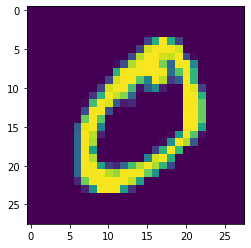

In [8]:
plt.imshow(x_train[1]);

In [10]:
#no of unique values 
set(y_train)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [12]:
from tensorflow.keras.utils import to_categorical


In [13]:
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [14]:
y_train.shape

(60000, 10)

In [15]:
x_train=x_train.reshape(x_train.shape[0],28,28,1)
x_test=x_test.reshape(x_test.shape[0],28,28,1)

In [16]:
from tensorflow.keras.models import Sequential


In [23]:
from tensorflow.keras.layers import Flatten,Conv2D,MaxPooling2D,Dense

In [24]:
model=Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
    MaxPooling2D(2,2),
    
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D(2,2),
    
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D(2,2),
    
    Flatten(),
    Dense(256,activation='relu'),
    Dense(10,activation='softmax')
    
])

In [20]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [21]:
from tensorflow.keras.callbacks import Callback

class mycallback(Callback):
    def on_epoch_end(self,epoch,logs={}):
        if(logs.get('accuracy')>0.99):
            print('/n Reached 99% accuracy')
            self.model.stop_training=True
            
            
callback=mycallback()

In [25]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 64)               

In [27]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [28]:
history=model.fit(x_train,y_train,epochs=10,validation_split=0.2,verbose=1,callbacks=[callback])

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 25s 514us/sample - loss: 0.3115 - accuracy: 0.9178 - val_loss: 0.1141 - val_accuracy: 0.9645
Epoch 2/10
48000/48000 [==============================] - 23s 476us/sample - loss: 0.0984 - accuracy: 0.9696 - val_loss: 0.0827 - val_accuracy: 0.9752
Epoch 3/10
48000/48000 [==============================] - 26s 544us/sample - loss: 0.0767 - accuracy: 0.9760 - val_loss: 0.0690 - val_accuracy: 0.9807
Epoch 4/10
48000/48000 [==============================] - 23s 486us/sample - loss: 0.0610 - accuracy: 0.9813 - val_loss: 0.0865 - val_accuracy: 0.9772
Epoch 5/10
48000/48000 [==============================] - 23s 475us/sample - loss: 0.0543 - accuracy: 0.9836 - val_loss: 0.0648 - val_accuracy: 0.9822
Epoch 6/10
48000/48000 [==============================] - 23s 476us/sample - loss: 0.0484 - accuracy: 0.9854 - val_loss: 0.0693 - val_accuracy: 0.9811
Epoch 7/10
48000/48000 [====================

In [33]:
history.history['accuracy']

[0.91777086,
 0.969625,
 0.9760208,
 0.9813125,
 0.98364586,
 0.9854375,
 0.9873125,
 0.98810416,
 0.9896042,
 0.9900625]

In [34]:
history.history['val_accuracy']

[0.9645,
 0.9751667,
 0.98066664,
 0.97716665,
 0.98225,
 0.98108333,
 0.98216665,
 0.98216665,
 0.984,
 0.98066664]

In [35]:
predictions=model.predict(x_test)

In [36]:
for i in range(3):
    print(np.argmax(predictions[i]))

7
2
1


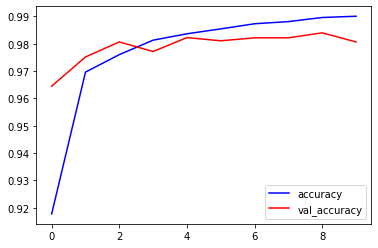

In [40]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
epochs=range(len(acc))

plt.plot(epochs,acc,'b',label='accuracy')
plt.plot(epochs,val_acc,'r',label='val_accuracy')
plt.legend()
plt.show()


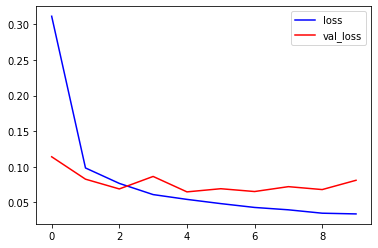

In [41]:
acc=history.history['loss']
val_acc=history.history['val_loss']
epochs=range(len(acc))

plt.plot(epochs,acc,'b',label='loss')
plt.plot(epochs,val_acc,'r',label='val_loss')
plt.legend()
plt.show()